## Tutorial ARIMA Models

#### Prepared by
### Karzanov Daniil, Molostvov Pavel, Zobov Vladimir

## TASK
Что ждем от туториала?

1. Оценить конкретную модель заданного класса.
Не только сделать .fit, но и выписать полученное уравнение!
2. Автоматически подобрать модель (встроенный подбор)
3. Построить графики прогнозов, интервальные прогнозы где есть.
4. Сравнить несколько (две-три) модели данного класса с помощью скользящего окна.
5. Творчество, любые дополнения, мемасики :)

Класс выбираем: ETS, ARIMA, BATS + TBATS, PROPHET, случайный лес + создание признаков, GARCH, своё предложить

Цель: когда через год будут люди спрашивать "как в питоне оценить ets/arima?" ответ должен быть "читайте туториалы от нашего курса!"

In statistics and econometrics, and in particular in time series analysis, an [autoregressive integrated moving average (ARIMA) model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting).

## Imports

First things first, we are are going to install and import modules need for the tutorial.

In [ ]:
!pip install statsmodels --quiet
!pip install pmdarima==1.8.0 --quiet

from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

import warnings
warnings.filterwarnings("ignore")

# setting graphs size
plt.rcParams["figure.figsize"] = [15,7]

##

## Data preparation

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'])
df.index = df.date
df = df.drop(columns=['date']).astype(float)


In [ ]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


As we can see from the table, the each row in the dataframe represents a value for each month between july 1991 and june 2008.

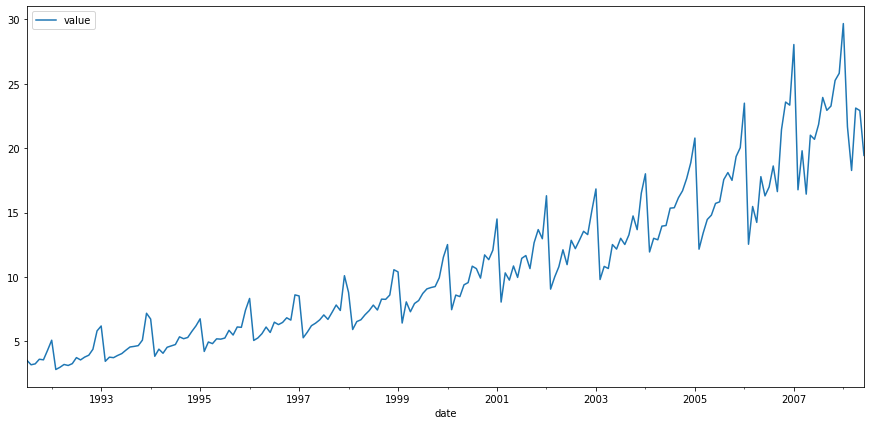

In [ ]:
df.plot()
plt.show()

#### Definition
In time series data, seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. 
Seasonal fluctuations in a time series can be contrasted with cyclical patterns.

**As we can see from the plot, our data is seasonal with one year period.**

## Auto Arima

Let us run ```auto_arima``` function from _pmdarima_ package. It will run all possible combinations of models given function parameters. We provide the description of the most important of them.

**start_p** : int, optional (default=2)

_The starting value of p, the order (or number of time lags) of the auto-regressive (“AR”) model. Must be a positive integer._

**d** : int, optional (default=None)

_The order of first-differencing. If None (by default), the value will automatically be selected based on the results of the test (i.e., either the Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or the Phillips–Perron test will be conducted to find the most probable value). Must be a positive integer or None. Note that if d is None, the runtime could be significantly longer._

**start_q** : int, optional (default=2)

_The starting value of q, the order of the moving-average (“MA”) model. Must be a positive integer._

**max_p** : int, optional (default=5)

_The maximum value of p, inclusive. Must be a positive integer greater than or equal to start_p._

**max_d** : int, optional (default=2)

_The maximum value of d, or the maximum number of non-seasonal differences. Must be a positive integer greater than or equal to d._

**max_q** : int, optional (default=5)

_The maximum value of q, inclusive. Must be a positive integer greater than start_q._

**start_P** : int, optional (default=1)

_The starting value of P, the order of the auto-regressive portion of the seasonal model._

**D** : int, optional (default=None)

_The order of the seasonal differencing. If None (by default, the value will automatically be selected based on the results of the seasonal_test. Must be a positive integer or None._

**start_Q** : int, optional (default=1)

_The starting value of Q, the order of the moving-average portion of the seasonal model._

**max_P** : int, optional (default=2)

_The maximum value of P, inclusive. Must be a positive integer greater than start_P._

**max_D** : int, optional (default=1)

_The maximum value of D. Must be a positive integer greater than D._

**max_Q** : int, optional (default=2)

_The maximum value of Q, inclusive. Must be a positive integer greater than start_Q._

**max_order** : int, optional (default=5)

_Maximum value of p+q+P+Q if model selection is not stepwise. If the sum of p and q is >= max_order, a model will not be fit with those parameters, but will progress to the next combination. Default is 5. If max_order is None, it means there are no constraints on maximum order._

**m** : int, optional (default=1)

_The period for seasonal differencing, m refers to the number of periods in each season. For example, m is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. Note that if m == 1 (i.e., is non-seasonal), seasonal will be set to False. For more information on setting this parameter, see Setting m._

**seasonal** : bool, optional (default=True)

_Whether to fit a seasonal ARIMA. Default is True. Note that if seasonal is True and m == 1, seasonal will be set to False._

**stationary** : bool, optional (default=False)

_Whether the time-series is stationary and d should be set to zero._

**information_criterion** : str, optional (default=’aic’)

_The information criterion used to select the best ARIMA model. One of pmdarima.arima.auto_arima.VALID_CRITERIA, (‘aic’, ‘bic’, ‘hqic’, ‘oob’)._

**stepwise** : bool, optional (default=True)

_Whether to use the stepwise algorithm outlined in Hyndman and Khandakar (2008) to identify the optimal model parameters. The stepwise algorithm can be significantly faster than fitting all (or a random subset of) hyper-parameter combinations and is less likely to over-fit the model._

**n_jobs** : int, optional (default=1)

_The number of models to fit in parallel in the case of a grid search (stepwise=False). Default is 1, but -1 can be used to designate “as many as possible”._

In [ ]:
results = pm.auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           njobs=-1,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
results.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=525.634, Time=0.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=659.245, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=560.558, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=529.539, Time=0.78 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=554.767, Time=0.14 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=527.119, Time=1.39 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=526.728, Time=3.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=530.976, Time=0.71 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=529.073, Time=7.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=553.046, Time=0.70 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=529.582, Time=2.02 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=527.568, Time=2.48 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=634.870, Time=0.43 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=526.962, Time=0.93 sec
 ARIMA(2,1,0)(0,1,1)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  204
Model:             SARIMAX(3, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -251.489
Date:                              Thu, 28 Jan 2021   AIC                            518.979
Time:                                      14:29:38   BIC                            544.997
Sample:                                           0   HQIC                           529.517
                                              - 204                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0098      0.005      1.991      0.046       0.000       0.019
ar.L1         -0.6183      0.127     -4.882      0.000      -0.866      -0.370
ar.L2          0.2979      0.101      2.962      0.003       0.101       0.495
ar.L3          0.4196      0.063      6.698      0.000       0.297       0.542
ma.L1         -0.3204      0.139     -2.308      0.021      -0.593      -0.048
ma.L2         -0.5838      0.124     -4.694      0.000      -0.828      -0.340
ma.S.L12      -0.4687      0.066     -7.125      0.000      -0.598      -0.340
sigma2         0.7934      0.056     14.240      0.000       0.684       0.903
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               115.93
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              13.91   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

According to the summary, the best model is $ARIMA(3,1,2)(0,1,1)_{12}$  
Recall, that for $ARIMA(p, d, q)$:
* $p$ represents auto regressive component
* $d$ represents the order of first-differencing
* $q$ represents moving average component

So, it can be described in the following way:  
$$ \Delta y_t = 0.618 y_{t-1} - 0.2979 y_{t-2}  - 0.4196 y_{t-3}  -0.3204 \epsilon_{t-1} -0.5838 \epsilon_{t-2} + \epsilon_{t} -0.4687 \epsilon_{t-12} + 0.0098$$

Apart from text summary, the module provides some graphical information.

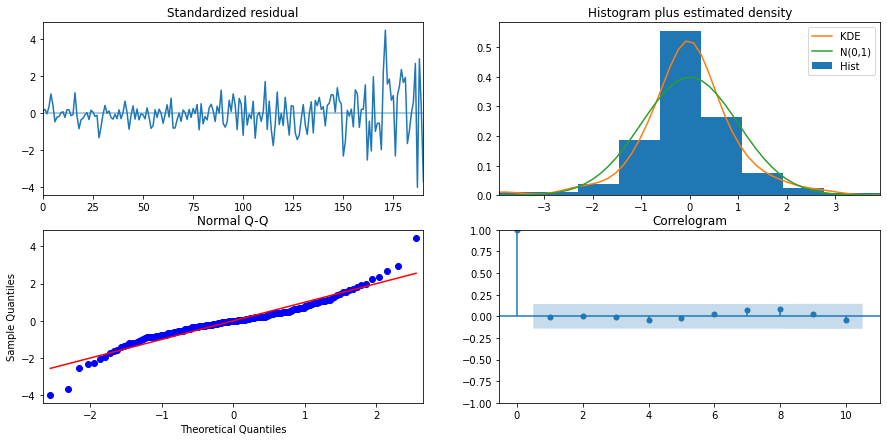

In [ ]:
results.plot_diagnostics()
plt.show()

Even though we could see that the process is not stationary, we can make the same conclusion from the diagnostics plots.


Let us extract the best model's parameters from auto_arima result object.

In [ ]:
p, d, q = results.order
print("p = {}, d = {}, q = {}".format(p, d, q))

P,D,Q,S = results.seasonal_order
print("P = {}, D = {}, Q = {}, S = {}".format(P,D,Q,S))

p = 3, d = 1, q = 2
P = 0, D = 1, Q = 1, S = 12


## Getting Prediction
We are going to make prediction about value for the last 25 month of observations. Firstly, we will fit the simplest model without seasonality and then will check how seasonality improves the fit.

We will use ```SARIMAX``` from ```statsmodels.tsa.statespace.sarimax``` module.

#### Without seasonality

In [ ]:
model = SARIMAX(df, order=(p, d, q))
results = model.fit()
forecast = results.get_prediction(start=-25)

In [ ]:
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

#### Visualization

Let us plot the initial data and predicted data together. The shaded are represents the confidence intervals.

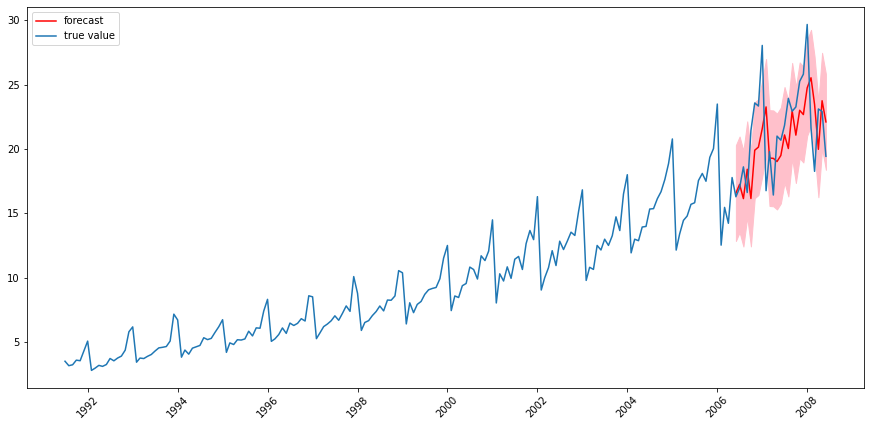

In [ ]:
plt.plot(mean_forecast.index,
          mean_forecast.values,
          color='red',
          label='forecast')
plt.plot(df.index, df.value, label='true value')

plt.xticks(rotation=45)
plt.legend()
plt.fill_between(confidence_intervals.index,
 confidence_intervals['lower value'],
  confidence_intervals['upper value'], color='pink')
plt.show()

Take a closer look.

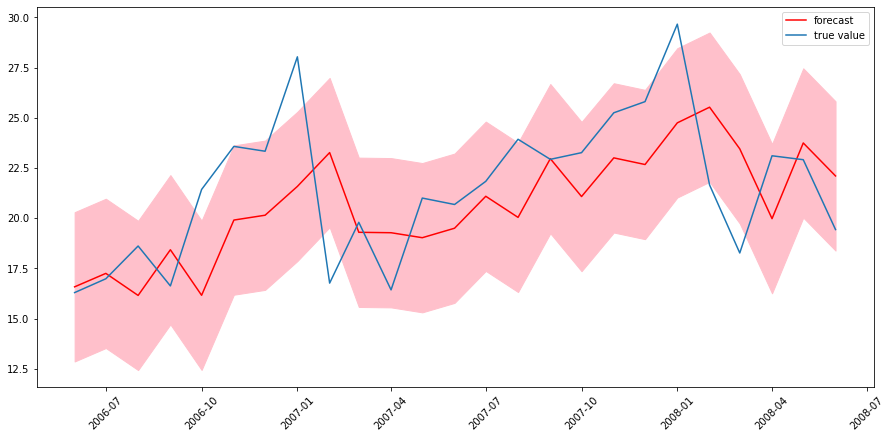

In [ ]:
plt.plot(mean_forecast.index,
          mean_forecast.values,
          color='red',
          label='forecast')
plt.plot(mean_forecast.index, df.loc[mean_forecast.index].value, label='true value')

plt.xticks(rotation=45)
plt.legend()
plt.fill_between(confidence_intervals.index, confidence_intervals['lower value'], confidence_intervals['upper value'], color='pink')
plt.show()

As the chart above illustrates the $ARIMA(3,1,2)$ without seasonality demonstrates a moreless good fit repeating some patterns from the initial data. However, the model underestimates the data in annual peak periods.

### With seasonality

In [ ]:
model = SARIMAX(df, order=(p, d, q), seasonal_order=(P,D,Q,S))
results = model.fit()
forecast = results.get_prediction(start=-25)

In [ ]:
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

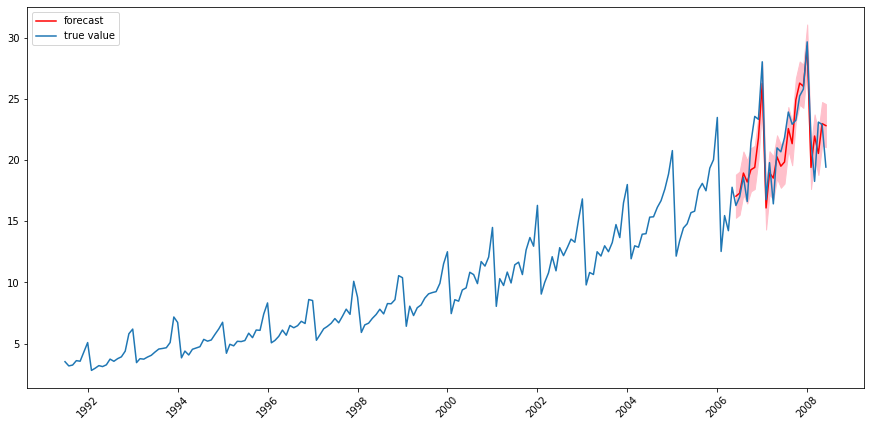

In [ ]:
plt.plot(mean_forecast.index,
          mean_forecast.values,
          color='red',
          label='forecast')
plt.plot(df.index, df.value, label='true value')

plt.xticks(rotation=45)
plt.legend()
plt.fill_between(confidence_intervals.index, confidence_intervals['lower value'],
 confidence_intervals['upper value'], color='pink')
plt.show()

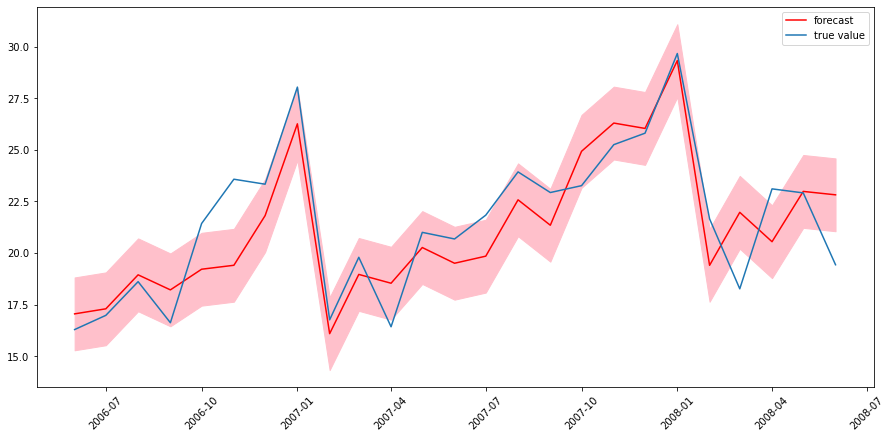

In [ ]:
plt.plot(mean_forecast.index,
          mean_forecast.values,
          color='red',
          label='forecast')
plt.plot(mean_forecast.index, df.loc[mean_forecast.index].value, label='true value')

plt.xticks(rotation=45)
plt.legend()
plt.fill_between(confidence_intervals.index, confidence_intervals['lower value'], confidence_intervals['upper value'], color='pink')
plt.show()

Indeed, taking into account seasonality improves the model prediction significantly. Apart from replicating the main trends and fluctuations of the initial data, this model predicts the peak point rather accurately.

### Another Dataset

Let us consider another dataset. This time we will choose the best model from several combinations by ourselves using [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) and [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) criterions.

In [ ]:
import statsmodels.api as sm

In [ ]:
df = pd.DataFrame(sm.datasets.co2.load().data)
df.index = df['index']
df = df.drop(columns=['index'])

<AxesSubplot:xlabel='index'>

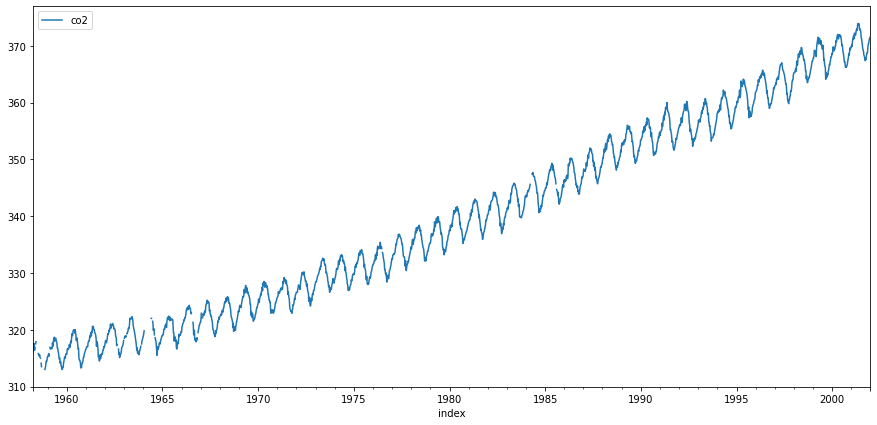

In [ ]:
df.plot()

In [ ]:
frame_compare = pd.DataFrame(columns=['p', 'd', 'q', 'AIC', "BIC"]) 

for d in range(2):
    for p in range(4):
        for q in range(4):
            model = SARIMAX(df, order=(p, d, q))
            results = model.fit(disp=0, njobs=-1)
            
            frame_compare.loc[len(frame_compare)] = (p, d, q, results.aic, results.bic)

frame_compare.sort_values(by=['AIC'])

,p,d,q,AIC,BIC
27,2.0,1.0,3.0,2703.294489,2737.693962
30,3.0,1.0,2.0,2722.106857,2756.506331
31,3.0,1.0,3.0,2734.161299,2774.294018
26,2.0,1.0,2.0,2737.962165,2766.628393
23,1.0,1.0,3.0,2749.977418,2778.643646
29,3.0,1.0,1.0,2808.202759,2836.868988
22,1.0,1.0,2.0,2833.422287,2856.355269
25,2.0,1.0,1.0,2914.958586,2937.891568
28,3.0,1.0,0.0,2919.208099,2942.141082
19,0.0,1.0,3.0,2995.025982,3017.958964


In [ ]:
p, d, q, aic, bic = frame_compare.sort_values(by=['AIC']).iloc[0]

In [ ]:
model = SARIMAX(df, order=(p, d, q))
results = model.fit()
forecast = results.get_prediction(start=-300)

In [ ]:
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

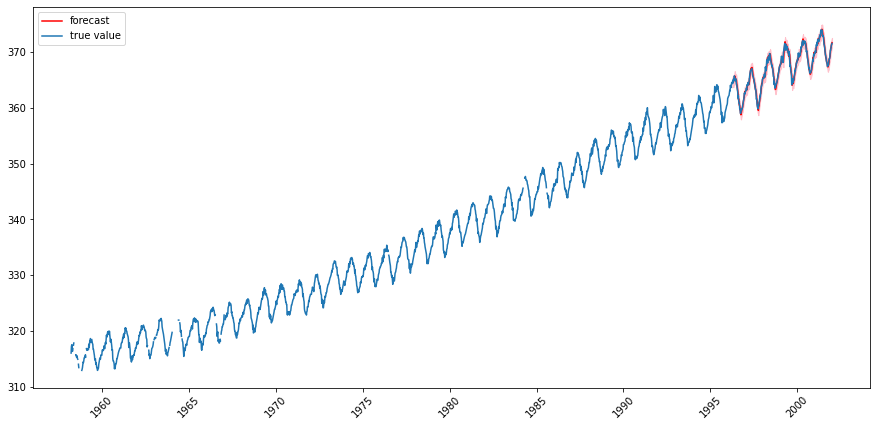

In [ ]:
plt.plot(mean_forecast.index,
          mean_forecast.values,
          color='red',
          label='forecast')
plt.plot(df.index, df.co2, label='true value')

plt.xticks(rotation=45)
plt.legend()
plt.fill_between(confidence_intervals.index, confidence_intervals['lower co2'], confidence_intervals['upper co2'], color='pink')
plt.show()

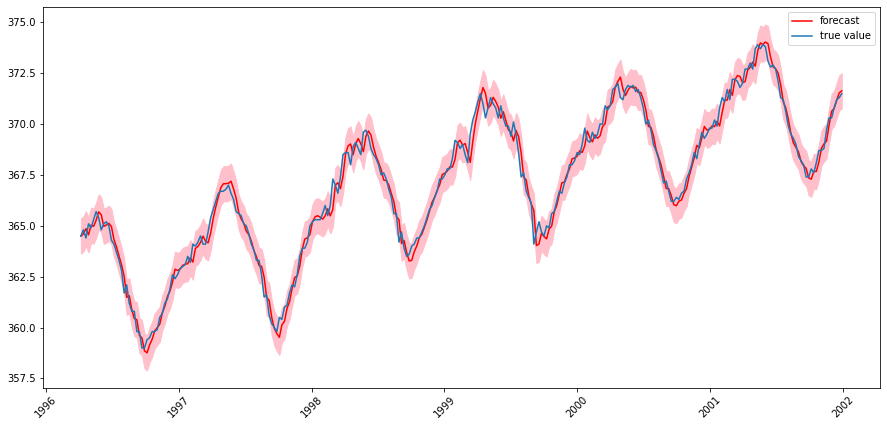

In [ ]:
plt.plot(mean_forecast.index,
          mean_forecast.values,
          color='red',
          label='forecast')
plt.plot(mean_forecast.index, df.loc[mean_forecast.index].co2, label='true value')

plt.xticks(rotation=45)
plt.legend()
plt.fill_between(confidence_intervals.index, confidence_intervals['lower co2'], confidence_intervals['upper co2'], color='pink')
plt.show()

As we can see, our implementation has demonstrated an amazingly good fit.